# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Описание полей

Описание полей данных:
- BeginDate – дата начала пользования услугами,
- EndDate – дата окончания пользования услугами,
- Type – тип оплаты: ежемесячный, годовой и тд,
- PaperlessBilling – безналичный расчет,
- PaymentMethod – способ оплаты,
- MonthlyCharges – ежемесячные траты на услуги,
- TotalCharges – всего потрачено денег на услуги
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

        ЦЕЛЬ
0 sp	  AUC-ROC < 0.75

4 sp	  0.75 ≤ AUC-ROC < 0.81

4.5 sp    0.81 ≤ AUC-ROC < 0.85

5 sp      0.85 ≤ AUC-ROC < 0.87

5.5 sp    0.87 ≤ AUC-ROC < 0.88

6 sp	  AUC-ROC ≥ 0.88

                                                    План проекта

            Предстоит построить прототип модели машинного обучения. Его разработка состоит из нескольких этапов:

-    Составьте план работы.  Исходное условие задачи заведомо неполное и содержит лишнюю информацию. Проведите исследовательский анализ данных, чтобы понять, какие вопросы подготовить. Составите примерный план решения задачи. Опишите 3–5 основных шагов, каждый пояснить не более двумя предложениями.
    
-    Уточните задачу. Задайте вопросы тимлиду.
    
-    Разработайте модель. Отдайте код на проверку ревьюверу.
    
-    Подготовьте отчёт. Отправьте отчёт тимлиду, чтобы он проверил успешность выполнения задания.

In [67]:
#!conda install -c conda-forge/label/cf202003 phik


## Глава 1. EDA


In [68]:
import pandas as pd
import numpy as np
import functools
from functools import reduce
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Для тренажера#
df_contract = pd.read_csv('/datasets/final_provider/'+ 'contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/'+ 'personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/'+ 'internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/'+ 'phone.csv')

In [69]:
#Локально
def create_df(data):
    return pd.read_csv('C:/Users/sergey.volkov/Desktop/YP/final_provider/' + data)
df_contract = create_df('contract.csv')
df_personal = create_df('personal.csv')
df_internet = create_df('internet.csv')
df_phone = create_df('phone.csv')

In [70]:
print(df_contract.info())
df_contract


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


В данном дата сете пропусков нет, с первого взгляда видно, что ряд столбцов необходимо переводит в нужный формат, в частности BeginDateб EndDate, MonthlyCharges, TotalCharges. Посмотрим на другие файлы, как вариант из EndDate можно будет сделать целевой признак, добавив доп. столбец, но сначала посмотрим на остальную информацию

In [71]:
print(df_personal.info())
df_personal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


Пропусков нет, формат столбцов менять не нужно, но пока не понятно зачем нам столбец SeniorCitizen(пенсионеры), возможно для них есть привелегии, посмотрим файлы далее.

In [72]:
print(df_internet.info())
df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


Датасет, где перечислены наличие услуг по ID клиента, пропуска нет, на первый взгляд много лишней инфы, как вариант нужнео объеденить все таблицы, где ключом будет customerID, может от кол-во услуг зависет фактор "выхода", вообщем смотрим дальше.

In [73]:
print(df_phone.info())
df_phone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


Пропусков нет, файлы в нужном формате.

Вывод:

В каждой таблице есть бинарные признаки(Yes, No), их необходимо перевести в 0 и 1, также нееобходимо перевести в числовой формат столбцы  MonthlyCharges, TotalCharges и формат дата столбцы BeginDate, EndDate. Добавим целевой признак отток клиентов(outflow), опираться будем на дату выхода, признак будет бинарный. После этого думаю объеденить таблицу, где ключом будет customerID, т.к. у нас разное кол-во строк, появяся пропуски, будем далее решать, что с ними делать....

In [74]:
#Добавим целевой признак
df_contract['outflow'] = df_contract['EndDate'].apply(lambda x: x if x == 'No' else 'Yes')

In [75]:
#Приведем формат obj в формат даты

df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')



df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], format='%Y-%m-%d')

In [76]:
df_contract['EndDate'] = df_contract['EndDate'].replace('No','2020-02-01')

df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], format='%Y-%m-%d')
#через replace не работет, интересно почему.

In [77]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,outflow
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


df_contract['EndDate'] = df_contract['EndDate'].apply(lambda x: '2020-02-01' if x == 'No' else x)

df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(str).astype('float64')
df_contract['TotalCharges'] = df_contract['TotalCharges'].apply('float64')

#df_contract['MonthlyCharges'] = df_contract['MonthlyCharges'].astype('float64')

In [78]:
#Переведем TotalCharges и MonthlyCharges в числовой тип.
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'],errors='coerce')
df_contract['MonthlyCharges'] = pd.to_numeric(df_contract['MonthlyCharges'],errors='coerce')


In [79]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   outflow           7043 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 495.3+ KB


Думаю, добавить еще один столбец, сколько дней пробыл клиент до момента выхода назовем его lifecycle, потом сделать объединение, посмотреть на пропуски и построим графики.

In [80]:
df_contract['lifetime'] = (df_contract['EndDate'] - df_contract['BeginDate'])

In [81]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,outflow,lifetime
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,No,31 days
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,No,1036 days
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,61 days
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,No,1371 days
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,61 days
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,No,730 days
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,No,2191 days
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,No,337 days
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,123 days


Необходимо перевести дни в числовой формат, как вариант эти данные сможем использовать для размера дисконта(дифференцируемы промокод)

In [82]:
df_contract['lifetime'] = df_contract['lifetime'].astype('timedelta64[D]').astype(int)

In [83]:
#df_contract['lifecycle'] = df_contract['lifecycle'] / 86400

In [84]:
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,outflow,lifetime
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,No,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,No,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,No,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,61
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,No,730
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,No,2191
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,No,337
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,123


Объединим таблицы в одну

In [85]:
#import functools
#from functools import reduce
data_frames = [df_contract, df_personal, df_internet, df_phone]
df_full = reduce(lambda  left,right: pd.merge(left, right, on='customerID', how='outer'), data_frames)

In [86]:
df_full

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,outflow,lifetime,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,No,31,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,No,1036,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,61,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,No,1371,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,61,...,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.50,No,730,...,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.90,No,2191,...,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,No,337,...,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,123,...,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [87]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   outflow           7043 non-null   object        
 9   lifetime          7043 non-null   int32         
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   5517 n

In [88]:
df_full['TotalCharges'].fillna(df_full['TotalCharges'].mean())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [89]:
df_full['TotalCharges'][df_full['TotalCharges'].isnull()]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

Пропуски в TotalCharges могут свидетельствовать о том, что клтент только подключился и смею предположить, что сюда можно занести данные из MonthlyCharges

In [90]:
df_full['TotalCharges'] = df_full['TotalCharges'][df_full['TotalCharges'].isnull()]=df_full['MonthlyCharges']

In [91]:
df_full['TotalCharges'][df_full['TotalCharges'].isnull()]

Series([], Name: TotalCharges, dtype: float64)

Выделим категориальные фичи и постооим по ним графики.

In [92]:
df_contract_categorial = df_contract[['Type', 'PaperlessBilling', 'PaymentMethod', 'outflow']]

In [93]:
def categorial_feature_distribution(df, column):
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.xticks(rotation=0)
    sns.countplot(x=column, data=df, palette='coolwarm')
    ax.set_title('Распределение по ' + column)
    plt.ylabel('Количество');

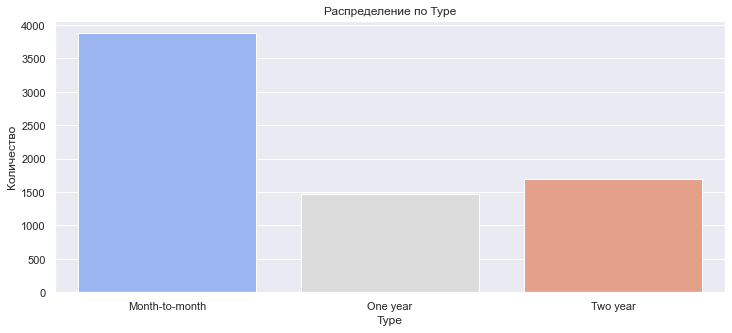

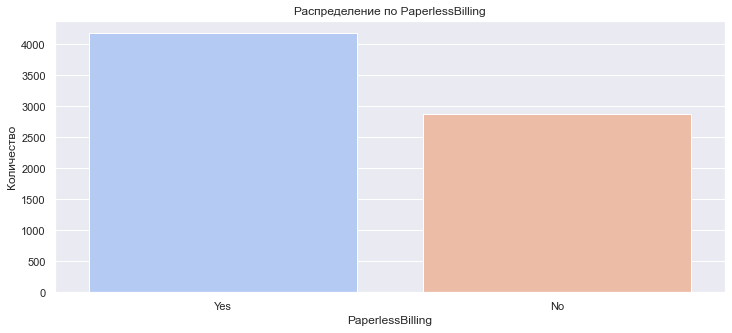

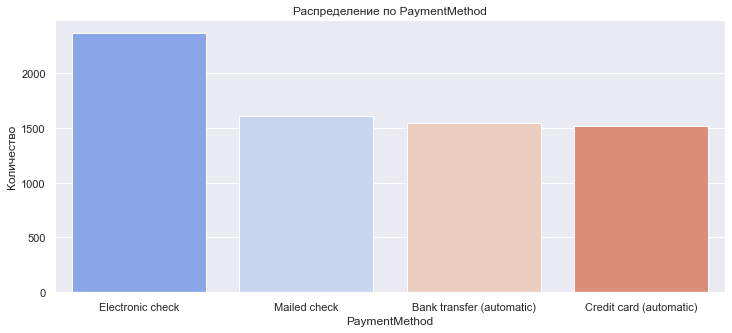

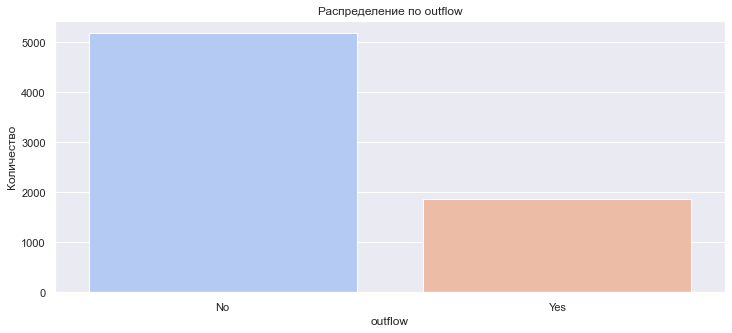

In [94]:
[categorial_feature_distribution(df_contract, item) for item in df_contract_categorial];

Вывод:

Тип оплаты - 3 категории, Безбумажный счет - бинарный, Метод оплаты - 4 категории, Целевой признак (отток) - бинарный

Основной метод оплаты - Month-to-month используют примерно 50% пользователей, два других One yea и Two year используют примерно по 25% пользователей
Безналичный расчет более популярен (что логично)

Electronic check больше всего используется, Mailed check, Credit card (automatic), Bank transfer (automatic) примерно одинаково
Отток клиентов по сравнению с лояльными достаточно высок(больше 1/3).

Выделим колличественные фичи и посмотрим на распределение

In [95]:
def numeric_feature_distribution(df, column):
    sns.set()
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.distplot(df[column])
    ax.set_title('Распределение по ' + column)
    plt.ylabel('Плотность частоты')

In [96]:
numeric_features = df_contract[['MonthlyCharges', 'TotalCharges','lifetime']]

[None, None, None]

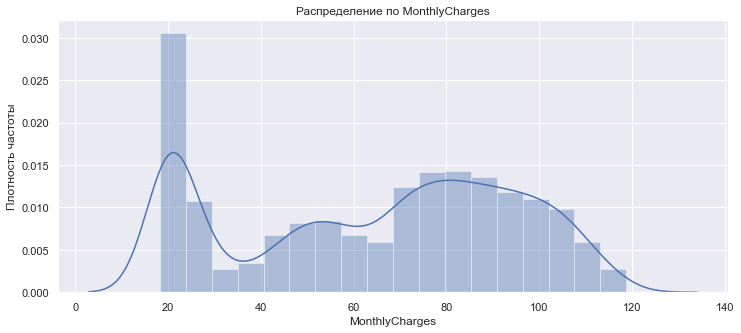

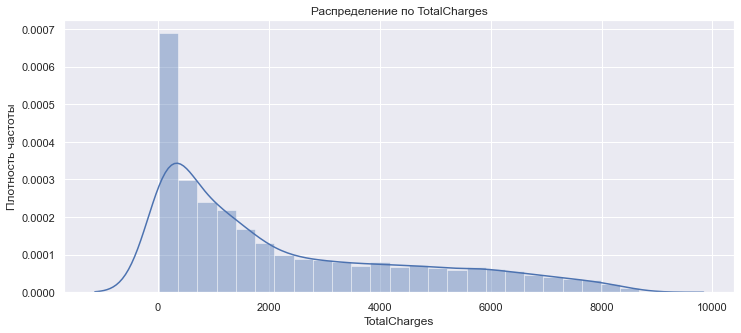

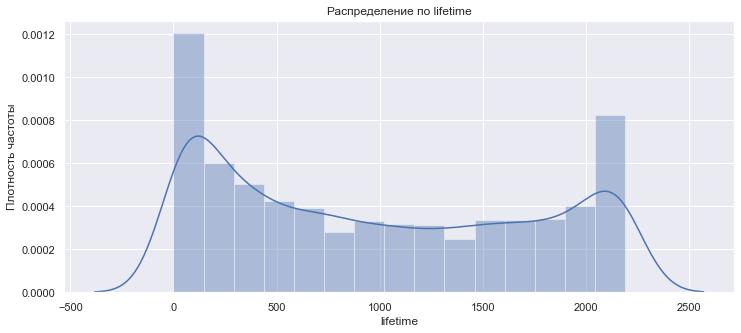

In [97]:
[numeric_feature_distribution(df_contract, item) for item in numeric_features]

Выводы:

MonthlyCharges - распределен бимодально, всплески около 20 и 80

TotalCharges - нормальное распределение с положительным смещением

lifetime - распределен бимодально, два всплеска - кто пользовался меньше полугода, тех кто больше 3 лет

Бимодальность скорей всего свидетельствует, что у нас две выборки в одной.

Попробуем приненить phik корреляцию к всему датасету, может увидим что-то интересное , далее "с узим" поиск.


https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

In [98]:
phik_overview = df_full.phik_matrix()
phik_overview

interval_cols not set, guessing: ['MonthlyCharges', 'TotalCharges', 'lifetime', 'SeniorCitizen']


var2,BeginDate,Dependents,DeviceProtection,EndDate,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,...,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,Type,customerID,gender,lifetime,outflow
var1,,,,,,,,,,,,,,,,,,,,,
BeginDate,1.000000,0.208566,0.525897,0.584146,0.121291,0.421886,0.461828,0.515376,0.462798,0.081448,...,0.050862,0.426962,0.413594,0.456376,0.421886,0.766249,1.0,0.011270,0.995272,0.495212
Dependents,0.208566,1.000000,0.131017,0.133425,0.206200,0.184366,0.035778,0.150651,0.244955,0.172593,...,0.324576,0.030892,0.080591,0.212177,0.184366,0.147680,1.0,0.000000,0.212207,0.253934
DeviceProtection,0.525897,0.131017,1.000000,0.143638,0.000000,0.495458,0.262064,0.285491,0.263022,0.029758,...,0.000000,0.437633,0.420014,0.360773,0.495458,0.247180,1.0,0.000000,0.544051,0.273309
EndDate,0.584146,0.133425,0.143638,1.000000,0.199142,0.319732,0.032408,0.161027,0.229311,0.156833,...,0.123124,0.025981,0.026053,0.224215,0.319732,0.357462,1.0,0.000000,0.408477,1.000000
InternetService,0.121291,0.206200,0.000000,0.199142,1.000000,0.948788,0.337836,0.008098,0.341952,0.363513,...,0.309469,0.246018,0.260566,0.326553,0.948788,0.115466,1.0,0.000000,0.000000,0.373345
MonthlyCharges,0.421886,0.184366,0.495458,0.319732,0.948788,1.000000,0.475526,0.427969,0.364873,0.467813,...,0.304983,0.727849,0.733267,0.403185,1.000000,0.388444,1.0,0.008175,0.411191,0.360050
MultipleLines,0.461828,0.035778,0.262064,0.032408,0.337836,0.475526,1.000000,0.250793,0.080518,0.269305,...,0.237595,0.340696,0.331484,0.086851,0.475526,0.071275,1.0,0.000000,0.470181,0.059390
OnlineBackup,0.515376,0.150651,0.285491,0.161027,0.008098,0.427969,0.250793,1.000000,0.277245,0.000000,...,0.000000,0.211498,0.227277,0.293663,0.427969,0.195385,1.0,0.003626,0.543070,0.301874
OnlineSecurity,0.462798,0.244955,0.263022,0.229311,0.341952,0.364873,0.080518,0.277245,1.000000,0.215269,...,0.170667,0.084428,0.065004,0.415484,0.364873,0.253529,1.0,0.017841,0.487584,0.425943


In [99]:
df_full.global_phik()

interval_cols not set, guessing: ['MonthlyCharges', 'TotalCharges', 'lifetime', 'SeniorCitizen']


(array([[1.02773654],
        [0.74130885],
        [       nan],
        [0.46372208],
        [1.10682247],
        [1.        ],
        [       nan],
        [0.52486385],
        [0.6489609 ],
        [0.33381775],
        [0.77280854],
        [0.10270842],
        [0.28451841],
        [0.73060136],
        [0.28158635],
        [0.67886861],
        [1.        ],
        [1.44818722],
        [       nan],
        [0.30651895],
        [0.96324177],
        [1.50898227]]),
 array(['BeginDate', 'Dependents', 'DeviceProtection', 'EndDate',
        'InternetService', 'MonthlyCharges', 'MultipleLines',
        'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner',
        'PaymentMethod', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV',
        'TechSupport', 'TotalCharges', 'Type', 'customerID', 'gender',
        'lifetime', 'outflow'], dtype=object))

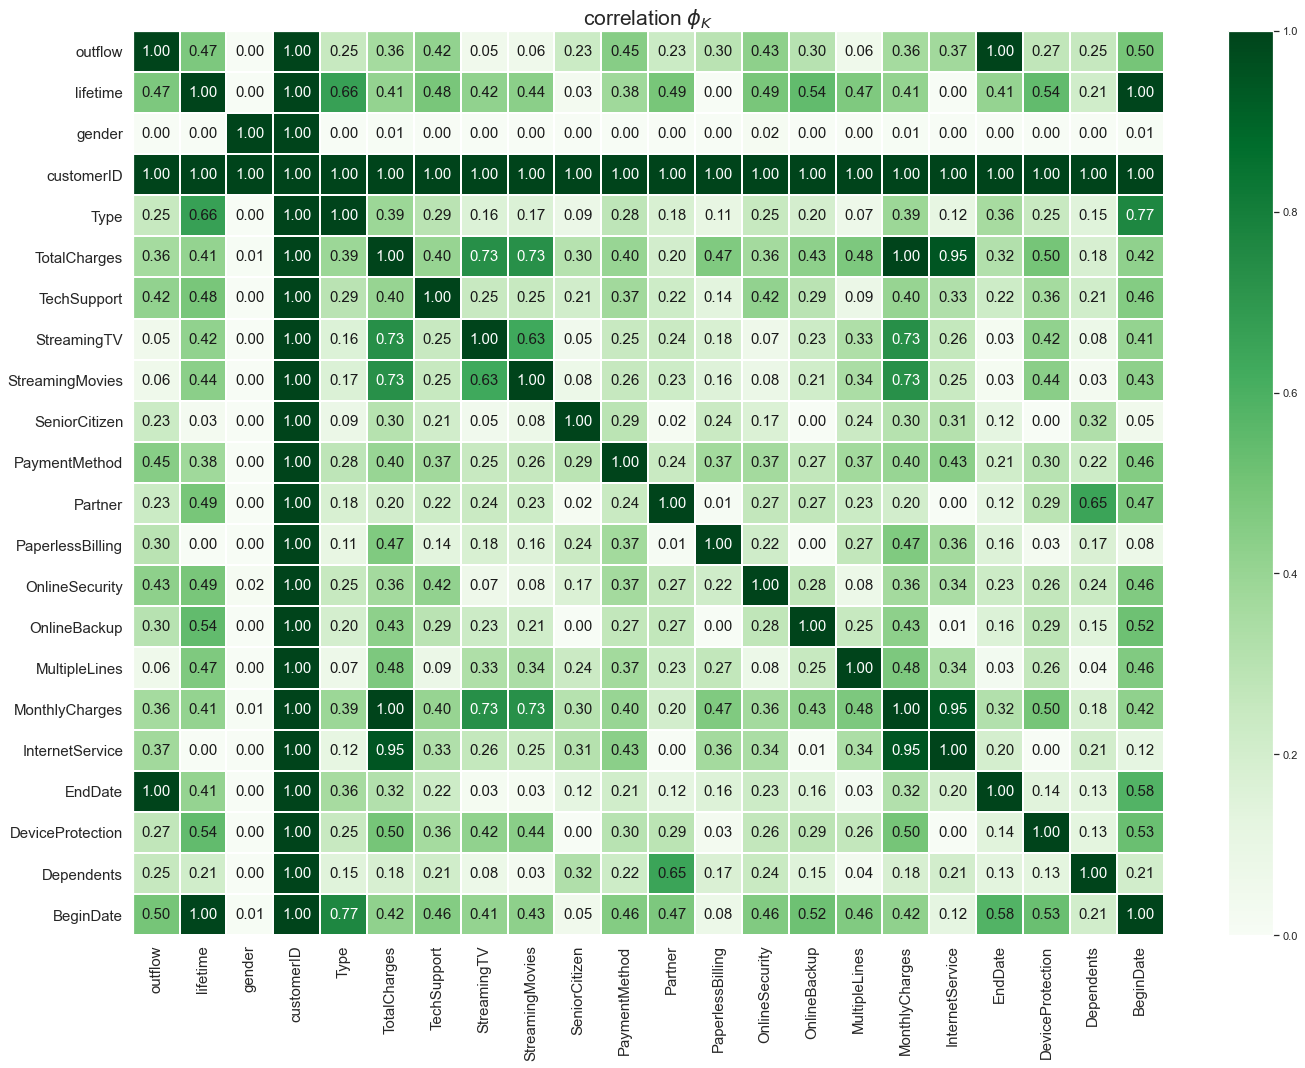

In [100]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))
plt.tight_layout()

В тепловой карте много информации, чуть сузим её для дальнейшего анализа, оставим наиболее коррелирующие факторы с целевым признаков outflow.

In [101]:
phik_matix = df_full[['MonthlyCharges', 'TotalCharges','lifetime', 'Type', 
                     'PaperlessBilling', 'PaymentMethod', 'outflow', 'InternetService','BeginDate','TechSupport']].phik_matrix()

interval_cols not set, guessing: ['MonthlyCharges', 'TotalCharges', 'lifetime']


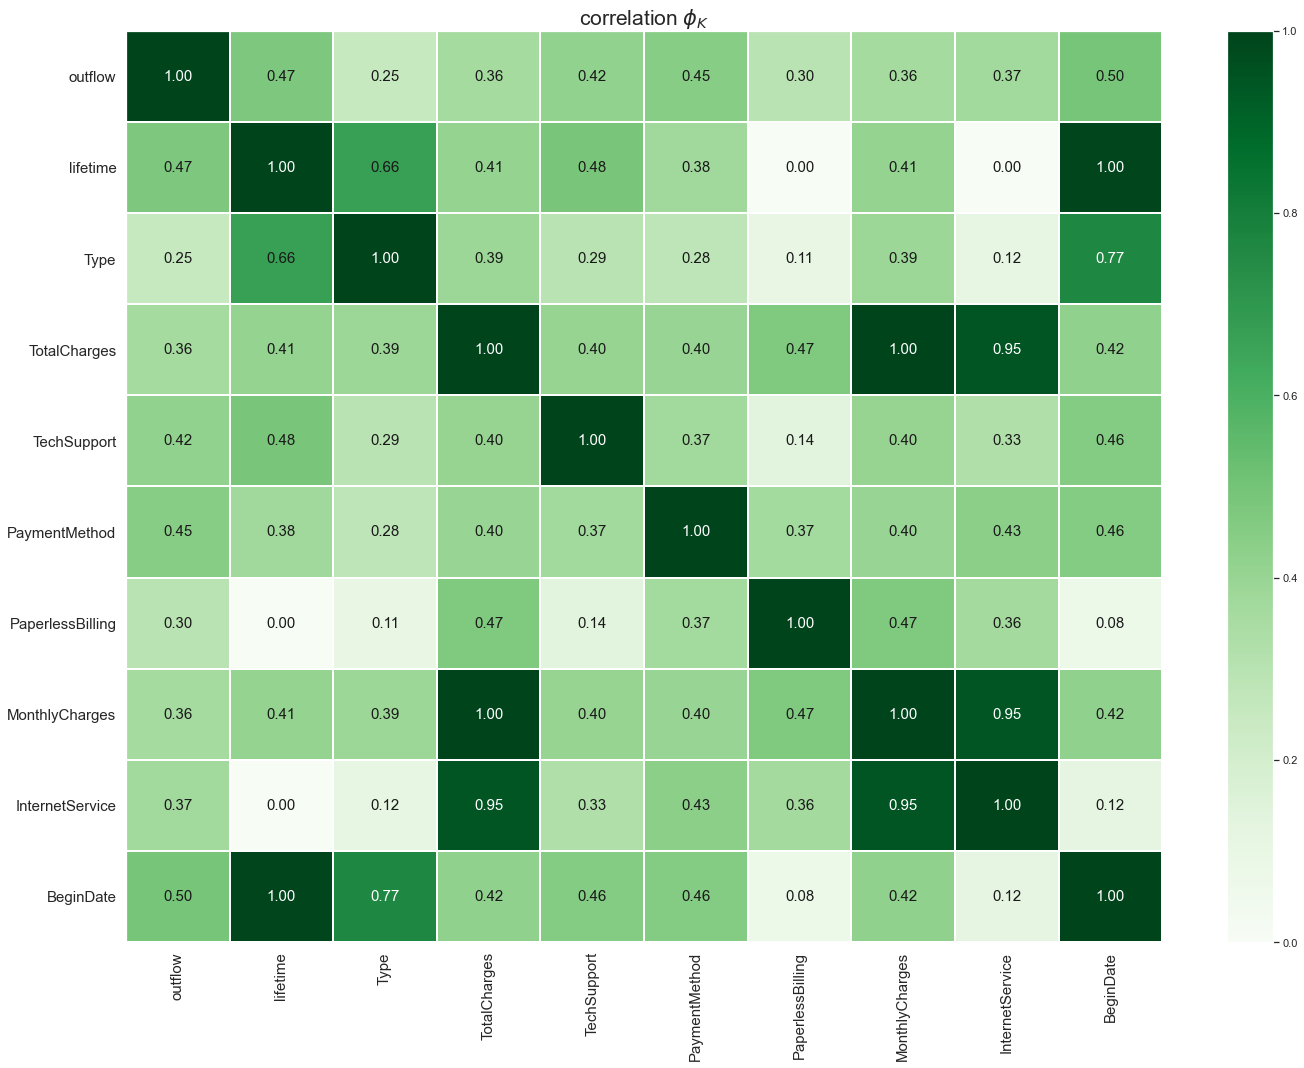

In [102]:
plot_correlation_matrix(phik_matix.values, 
                        x_labels=phik_matix.columns, 
                        y_labels=phik_matix.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 15))
plt.tight_layout()

Вывод: можно сделать вывод, что на фактор ухода влияет дата начала, точнее время продолжительности пользования услугами (lifetime), TotalCharge общая стоимость услуг, по всей видимости клиенты считают, что услуги не соответствуют стоимоти, это еще можно судить по наличию выделенной линии тех. поддержки, видимо у провайдера бывают перебои, и линия тех поддержки влияет как удерживающий фактор, также влияет метод оплаты, т.к. у нас 4 способа оплаты хорошы бы посмотреть кто уходит чаще, точнее при каком способе оплате.

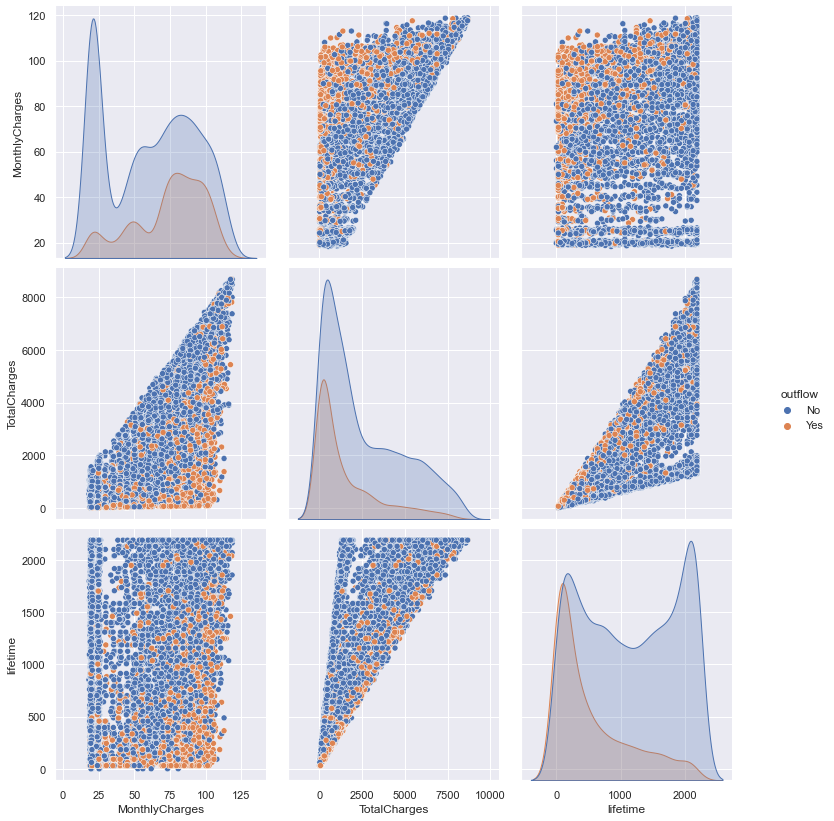

In [103]:
sns.pairplot(df_contract, hue='outflow').fig.set_size_inches(12,12)

Посмотрим прикаком способе оплаты уходят чаще и также посмотрим детальней на TechSUpport и уход клиента.

In [104]:
outflow_pm = df_full.groupby(['PaymentMethod', 'outflow']).agg({'outflow':'count'}) 
outflow_pm

outflow
PaymentMethod             outflow         
Bank transfer (automatic) No          1286
                          Yes          258
Credit card (automatic)   No          1290
                          Yes          232
Electronic check          No          1294
                          Yes         1071
Mailed check              No          1304
                          Yes          308

In [105]:
outflow_ts = df_full.groupby(['TechSupport', 'outflow']).agg({'outflow':'count'})
outflow_ts

outflow
TechSupport outflow         
No          No          2027
            Yes         1446
Yes         No          1734
            Yes          310

Ну и для наглядности посмотрим на фактор ухода по Type и PaperlessBilling

In [106]:
outflow_t = df_full.groupby(['Type', 'outflow']).agg({'outflow':'count'})
outflow_t

outflow
Type           outflow         
Month-to-month No          2220
               Yes         1655
One year       No          1307
               Yes          166
Two year       No          1647
               Yes           48

In [107]:
outflow_pb = df_full.groupby(['PaperlessBilling', 'outflow']).agg({'outflow':'count'})
outflow_pb

outflow
PaperlessBilling outflow         
No               No          2403
                 Yes          469
Yes              No          2771
                 Yes         1400

Выводы:

Чаще уходят кто оплачивает помесячно, но таких абонентов в принципе больше.

Оплачивающие по средством безналу мене  склонны к уходу

У Electronic check самый высокий отток, почти равный лояльным. Вероятно, с системой онлайн оплаты есть проблемы.

Для общего вывода можно еще посмотреть как влияет на фактор ухода гендер, семейное положение, возвраст и наличие иждевенцев

In [108]:
df_full.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'outflow',
       'lifetime', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')

In [109]:
outflow_sc = df_full.groupby(['SeniorCitizen', 'outflow']).agg({'outflow':'count'})
outflow_sc

outflow
SeniorCitizen outflow         
0             No          4508
              Yes         1393
1             No           666
              Yes          476

In [110]:
outflow_d = df_full.groupby(['Dependents', 'outflow']).agg({'outflow':'count'})
outflow_d

outflow
Dependents outflow         
No         No          3390
           Yes         1543
Yes        No          1784
           Yes          326

In [111]:
outflow_g = df_full.groupby(['gender', 'outflow']).agg({'outflow':'count'})
outflow_g

outflow
gender outflow         
Female No          2549
       Yes          939
Male   No          2625
       Yes          930

In [112]:
outflow_p = df_full.groupby(['Partner', 'outflow']).agg({'outflow':'count'})
outflow_p

outflow
Partner outflow         
No      No          2441
        Yes         1200
Yes     No          2733
        Yes          669

Можем посмотреть соотношение по другим категориальным параметрам, для более объективного общего вывода.

In [113]:
outflow_is = df_full.groupby(['InternetService', 'outflow']).agg({'outflow':'count'})
outflow_is

outflow
InternetService outflow         
DSL             No          1962
                Yes          459
Fiber optic     No          1799
                Yes         1297

In [114]:
outflow_os = df_full.groupby(['OnlineSecurity', 'outflow']).agg({'outflow':'count'})
outflow_os

outflow
OnlineSecurity outflow         
No             No          2037
               Yes         1461
Yes            No          1724
               Yes          295

In [115]:
outflow_ob = df_full.groupby(['OnlineBackup', 'outflow']).agg({'outflow':'count'})
outflow_ob

outflow
OnlineBackup outflow         
No           No          1855
             Yes         1233
Yes          No          1906
             Yes          523

In [116]:
outflow_dp = df_full.groupby(['DeviceProtection', 'outflow']).agg({'outflow':'count'})
outflow_dp

outflow
DeviceProtection outflow         
No               No          1884
                 Yes         1211
Yes              No          1877
                 Yes          545

In [117]:
outflow_stv = df_full.groupby(['StreamingTV', 'outflow']).agg({'outflow':'count'})
outflow_stv

outflow
StreamingTV outflow         
No          No          1868
            Yes          942
Yes         No          1893
            Yes          814

In [118]:
outflow_stv = df_full.groupby(['StreamingMovies', 'outflow']).agg({'outflow':'count'})
outflow_stv

outflow
StreamingMovies outflow         
No              No          1847
                Yes          938
Yes             No          1914
                Yes          818

In [119]:
outflow_ml = df_full.groupby(['MultipleLines', 'outflow']).agg({'outflow':'count'})
outflow_ml

outflow
MultipleLines outflow         
No            No          2541
              Yes          849
Yes           No          2121
              Yes          850

# Общий вывод по первой главе:

Можно сказать подтвердились превичные выводы и данные phik корреляции. 

- Чаще уходят в основном те, кто получает большие счета за услуги и уходят в основном на первых месяцах

- Чаще уходят кто оплачивает помесячно и оплачивающие по средством PaperlessBilling

- У Electronic check высокий отток, почти равный лояльным. Вероятно, с системой онлайн оплаты есть проблемы

- Одиночки чаще уходят из компании, чем в паре и с детьми. Определяет непостоянство одиночек в целом

- Пользователи DSL более консервативны и лояльны, чем более прогрессивные пользователи оптики

- Пользователи блокировки небезопасных сайтов(OnlineSecurity), резервного копирования данных(OnlineBackup), 
антивируса(DeviceProtection) и выделенной линии технической поддержки(TechSupport) менее склонны к уходу, значит более довольны качеством этих услуг, чем те у кого их нет.

- Пользователей интернета у ушедших клиентов выше, чем у лояльных. Вероятно в большей части, там молодое поколение 

- также чаще уходят клиенты, которые платят ежемесячно. 

Такое чувство, что у поставщика услуг есть технические проблемы и в целом люди не готовы за это платить такие деньги...


## Глава 2. Подготовка данных для моделей

In [120]:
df_full.isnull().mean()

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.000000
outflow             0.000000
lifetime            0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
InternetService     0.216669
OnlineSecurity      0.216669
OnlineBackup        0.216669
DeviceProtection    0.216669
TechSupport         0.216669
StreamingTV         0.216669
StreamingMovies     0.216669
MultipleLines       0.096834
dtype: float64

ПОдготовим данные для модели, преобразуем целевой признак outflow на 0 и 1, удилим лишние столбцы, закодируем данные методот OHE, далее посмотрим на модель, возможно потребуется сгенерировать дополнительные фичи, ну и разделим выборки.

In [121]:
#Преобразуем целевой признак outflow на 0 и 1

df_full['outflow'] = df_full['outflow'].apply(lambda x: 1 if x=='Yes' else 0)

Удалим лишние столбцы customerID, BeginDate, EndDate, т.к.customerid не несет никакой ценности, а даты, если не удалить, приведут к утечке. gender, MultipleLines,  StreamingTV удалим, т.к. они не несут никакой важности, это мы определили в EDA.



In [122]:

df_full = df_full.drop(['customerID', 'BeginDate', 'EndDate', 'gender','MultipleLines', 'StreamingTV'], axis=1)

Преобразуем категориальное признаки в численные методо OHE

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle


In [124]:
df_ohe = pd.get_dummies(df_full, drop_first=True)
df_ohe

,MonthlyCharges,TotalCharges,outflow,lifetime,SeniorCitizen,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes
0,29.85,29.85,0,31,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1,56.95,56.95,0,1036,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,53.85,53.85,1,61,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,42.30,42.30,0,1371,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
4,70.70,70.70,1,61,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,84.80,0,730,0,1,0,1,0,0,1,1,1,0,1,0,1,1,1
7039,103.20,103.20,0,2191,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1
7040,29.60,29.60,0,337,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0
7041,74.40,74.40,1,123,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0


Разделим датафрейм на 2 части: обучающую и тестовую выбороки

In [125]:
df_train, df_test = train_test_split(df_ohe, test_size=0.2, random_state=12345)

In [126]:
df_train.shape, df_test.shape

((5634, 19), (1409, 19))

Разделим выборки на X - признаки и y — целевой признак.

In [127]:
X_train = df_train.drop(['outflow'], axis=1)
y_train = df_train['outflow']
X_test = df_test.drop(['outflow'], axis=1)
y_test = df_test['outflow']

Отмаштабировать признаки, воспользуемся одним из методов масштабирования — стандартизации данных.
В sklearn есть отдельная структура для стандартизации данных — StandardScaler
Преобразуем обучающую и тестовую выборки функцией transform().

In [128]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Выводы по главе 2:
 - Дисбаланс в целевом признаке был устранен
 - Категориальеные признаки перевели в численные через One-Hot Encoding, количественные нормировали через StandardScaler
 - Данные подготовлены для обучения

# Глава 3. Обучение моделей

В качестве базовой модели возьмем Логистическую регрессию и СлучайныйЛес, в качестве проверки LGBM и CatBoost

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [130]:
def model_learning(model, parameters):
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=12345)
    grid_model = GridSearchCV(model, parameters, scoring='roc_auc', cv=cv)
    grid_model.fit(X_train, y_train)
    print('Лучшая оценка на валидации: ', grid_model.best_score_)
    print('Лучшие гиперпараметры модели на валидации: ', grid_model.best_params_)
    print('Лучшая модель: ', grid_model.best_estimator_)
    return grid_model.best_estimator_

In [131]:
def test_scoring(model):
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)
    print('Accuracy: ', round(model.score(X_test, y_test), 3))
    print('Presicion: ', round(precision_score(y_test, pred_test), 3))
    print('Recall: ', round(recall_score(y_test, pred_test), 3))
    print('AUC-ROC: ', round(roc_auc_score(y_test, pred_proba_test), 3))

Обучим модель Случайный Лес

In [132]:
%%time
rf = RandomForestClassifier(random_state=12345, n_jobs=-1)
rf_param = {'n_estimators': [300, 500, 1000],
            'max_depth': [None, 10, 15],
            'min_samples_leaf': np.arange(1, 6, 2),
            'min_samples_split': np.arange(2, 7, 2)}

rf_fitted = model_learning(rf, rf_param)
test_scoring(rf_fitted)

Лучшая оценка на валидации:  0.8520359481748199
Лучшие гиперпараметры модели на валидации:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 500}
Лучшая модель:  RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=500,
                       n_jobs=-1, random_state=12345)
Accuracy:  0.814
Presicion:  0.713
Recall:  0.517
AUC-ROC:  0.859
Wall time: 7min 7s


Обучим модель Логистической регрессии.

In [133]:
%%time
lr = LogisticRegression(random_state=12345, n_jobs=-1)
lr_param = {'C' : np.linspace(0.001, 10, 20)}

lr_fitted = model_learning(lr, lr_param)
test_scoring(lr_fitted)

Лучшая оценка на валидации:  0.8347424488160348
Лучшие гиперпараметры модели на валидации:  {'C': 1.5797894736842104}
Лучшая модель:  LogisticRegression(C=1.5797894736842104, n_jobs=-1, random_state=12345)
Accuracy:  0.801
Presicion:  0.667
Recall:  0.522
AUC-ROC:  0.841
Wall time: 1.46 s


Обучим модель LBM

In [134]:
%%time
lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=12345)
lgbm_clf_param = {'n_estimators': [300, 500, 1000],
                  'learning_rate': [0.01, 0.1, 1],
                  'max_depth': [1, 5, 9],
                  'l2_leaf_reg': [1, 3]}
    
lgbm_clf_fitted = model_learning(lgbm_clf, lgbm_clf_param)
test_scoring(lgbm_clf_fitted)

[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [

Обучим модель Catboost

In [135]:
%%time
CatBoost_clf = CatBoostClassifier(random_state=12345, verbose=0)
CatBoost_clf_param = {'n_estimators': [300, 500, 1000],
                      'learning_rate': [0.01, 0.1, 1],
                      'max_depth': [1, 5, 9],
                      'l2_leaf_reg': [1, 3]}

CatBoost_fitted = model_learning(CatBoost_clf, CatBoost_clf_param)
test_scoring(CatBoost_fitted)

Лучшая оценка на валидации:  0.9176583101136356
Лучшие гиперпараметры модели на валидации:  {'l2_leaf_reg': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Лучшая модель:  <catboost.core.CatBoostClassifier object at 0x000002A697B0C8E0>
Accuracy:  0.886
Presicion:  0.829
Recall:  0.728
AUC-ROC:  0.928
Wall time: 11min 10s


In [137]:
CatBoost_fitted.get_feature_importance(prettified=True)

,Feature Id,Importances
0,2,58.057534
1,0,13.880782
2,1,5.127953
3,5,3.553007
4,6,2.100247
5,8,1.787314
6,4,1.656691
7,11,1.521901
8,10,1.486273
9,12,1.424486


Из-за масштабирования "сбросились" название столбцов, сделаем чуть по другому.

In [151]:
X_test_1 = df_test.drop(['outflow'], axis=1)

In [152]:
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=X_test_1.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

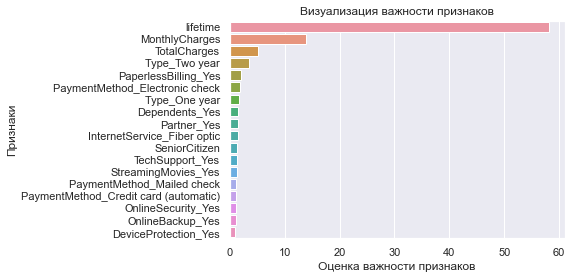

In [153]:
chart_feature_imp(CatBoost_fitted)

Самые важные фичи это "время жизни клиента", месячнвя плата, общая плата, это подтверждает выводы на основе phik корреляции.

In [150]:
data = {'Модель':['RandomForestClassifier','LogisticRegression','LGBMClassifier', 'CatBoostClassifier'], 
        'Presicion': [0.7, 0.667, 0.807, 0.829],
        'Recall': [0.517, 0.522, 0.694, 0.728],
        'Accuracy':[0.814, 0.801, 0.873, 0.886],
        'AUC-ROC': [0.859, 0.841, 0.916, 0.928],
        'Скорость обучения': ['7min 7s', '1,20 s','1min 29s', '11min 10s']}

pd.DataFrame(data)

,Модель,Presicion,Recall,Accuracy,AUC-ROC,Скорость обучения
0,RandomForestClassifier,0.700,0.517,0.814,0.859,7min 7s
1,LogisticRegression,0.667,0.522,0.801,0.841,"1,20 s"
2,LGBMClassifier,0.807,0.694,0.873,0.916,1min 29s
3,CatBoostClassifier,0.829,0.728,0.886,0.928,11min 10s


Дополнительно взял precision и recall специально, чтоб было видно некий балланс, т.к. нам важно именно правтильно раздать доп. скидку. Можно было бы взять F- метрику, но на мой взгляд т.к. больше вероятности ошибиться.

# Вывод по главе :
 - Логистическая регрессия уступает по интересующим метрикам качества (Accuracy, AUC-ROC) другим моделям с лесами, но выигрывает сильно во времени обучения
 - Случайный лес немного лучше, но дольше обучается, особенно когда много деревьев
 - Лучшие по качеству метрик модели градиентного бустинга, но у этого есть обратная сторона - долгое время обучения.
 - Лучшая модель по оценкам интересующих метрик - CatBoost, минус - долго обучается.
 - Наиболее значимыми признаки:

- MonthlyCharges    
- lifetime  
- TotalCharges

# Общий вывод:

<li>Исследовательский анализ данных позволил определить группы пользователей, которые склонны к уходу. Основывась на этих данных можно сформировать портреты лояльных и нелояльных клиентов и предпринять упреждающие событию действия, направленые на удержание клиента. Также следовало бы обратить внимание на то, что много клиентов уходят, укоторых нет тех поддержки, это может свидельствовать на плохое качество услуг.</li>
<li>Машинное обучение позволяет видеть метрики вероятности ухода клиента. В нашем случае у моделей:</li>
- Accuracy примерно: 0.85

- AUC-ROC примерно: 0.9

То есть с вероятностью 85% модели могут дать правильный прогноз
Лучшая модель по указанным метрикам и скорости обучения - LGBM

- Accuracy: 0.873

- AUC-ROC: 0.916

- Скорость обучения: 1min29s

<li>Основываясь на коэффициент отношения времени к  всего потрачено денег на услуги можно определиться с размером промокода.

In [162]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   outflow           7043 non-null   int64  
 6   lifetime          7043 non-null   int32  
 7   SeniorCitizen     7043 non-null   int64  
 8   Partner           7043 non-null   object 
 9   Dependents        7043 non-null   object 
 10  InternetService   5517 non-null   object 
 11  OnlineSecurity    5517 non-null   object 
 12  OnlineBackup      5517 non-null   object 
 13  DeviceProtection  5517 non-null   object 
 14  TechSupport       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(

In [173]:
df_full['K'] = df_full['lifetime'] / df_full ['TotalCharges']
print(len(df_full['K']))
df_full['K'].describe()

7043


count    7043.000000
mean       19.764624
std        22.193368
min         0.000000
25%         4.600706
50%        14.170543
75%        23.815217
max       113.523316
Name: K, dtype: float64